In [1]:
%run 'Import Dbase.ipynb'
%run 'Import Plots.ipynb'

/home/ihs01/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
ChooseBox

In [3]:
tableWid = widgets.Dropdown(
    description='Run/Table',
    options={'Table 005' : 5,
             'Table 007' : 7,
             'Table 006' : 6,
             'Table 008' : 8,
             'Table 009' : 9,
             'Table 010' : 10,
             'Table 011' : 11,
             'Table 012' : 12},
    value=11,
)


reactorWid = widgets.Dropdown(
    description='Reactor/dBase',
    options={'Reactor 005' : 5,
             'Reactor 006' : 6,
             'Reactor 007' : 7},
    value=7,
)


updateWid = widgets.Checkbox(
description='Update Data',
value=False
)
    
table = tableWid
dBase = reactorWid
new = updateWid
ChooseBox = HBox([dBase, table, new])
df = pd.DataFrame()
OLD_TABLE = 0
NEW_TABLE = 0

def initConsole(tbl, rct, getData, df):
    tbl = tbl.value
    rct = rct.value
    getData = getData.value
    global OLD_TABLE
    global NEW_TABLE
    
    NEW_TABLE = tbl
    TABLE = '{0:03d}'.format(tbl)
    RCT = '{0:03d}'.format(rct)
    
    pickleFile = '../DATA/rct' + RCT + 'run' + TABLE + '.pkl'
    if rct==5:
        dbName = 'rct' + RCT[1:] + 'db'
        tbName = TABLE + '_data'
        dbName = 'rct' + RCT 
        tbName = 'test_plcdata'

        if NEW_TABLE!=OLD_TABLE:
            # if file exist return it or else do a dbase read
            OLD_TABLE = tbl
            if exists(pickleFile):
                df = readDataFrame(pickleFile)
            else:
                default_start = '1999-12-28 18:00:00'
                time_now = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                cursor = connectDbase(dbName)
                df = readPartTable(cursor,tbName, default_start, time_now)

        elif getData:
            if df.empty:
                print 'Empty DataFrame'
            else:
                cursor = connectDbase(dbName)
                df = update(cursor, df, tbName, pickleFile)    
                
    if rct==7:
        print 'here'
        dbName = 'rct' + RCT 

        tbName0 = 'rct007_testID'
        tbName1 = 'test_flowindata'
        tbName2 = 'test_flowoutdata'
        tbName3 = 'test_plcdata'
        tbName4 = 'test_voltagedata'

        cursor = connectDbase(dbName)
        df0 = readNoDateTable(cursor, tbName0)
        df1 = readTable(cursor, tbName1)
        df2 = readTable(cursor, tbName2)
        df3 = readTable(cursor, tbName3)
#        df4 = readTable(cursor, tbName4)
        df = [df0, df1, df2, df3]
#         if NEW_TABLE!=OLD_TABLE:
#             # if file exist return it or else do a dbase read
#             OLD_TABLE = tbl
#             if exists(pickleFile):
#                 df = readDataFrame(pickleFile)
#             else:
#                 default_start = '1999-12-28 18:00:00'
#                 time_now = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
#                 cursor = connectDbase(dbName)
#                 df = readPartTable(cursor,tbName, default_start, time_now)

#         elif getData:
#             if df.empty:
#                 print 'Empty DataFrame'
#             else:
#                 cursor = connectDbase(dbName)
#                 df = update(cursor, df, tbName, pickleFile)                

    return df

df = initConsole(table, dBase, new, df)

here


In [4]:
plc = df[3]

In [5]:
fi = df[1]

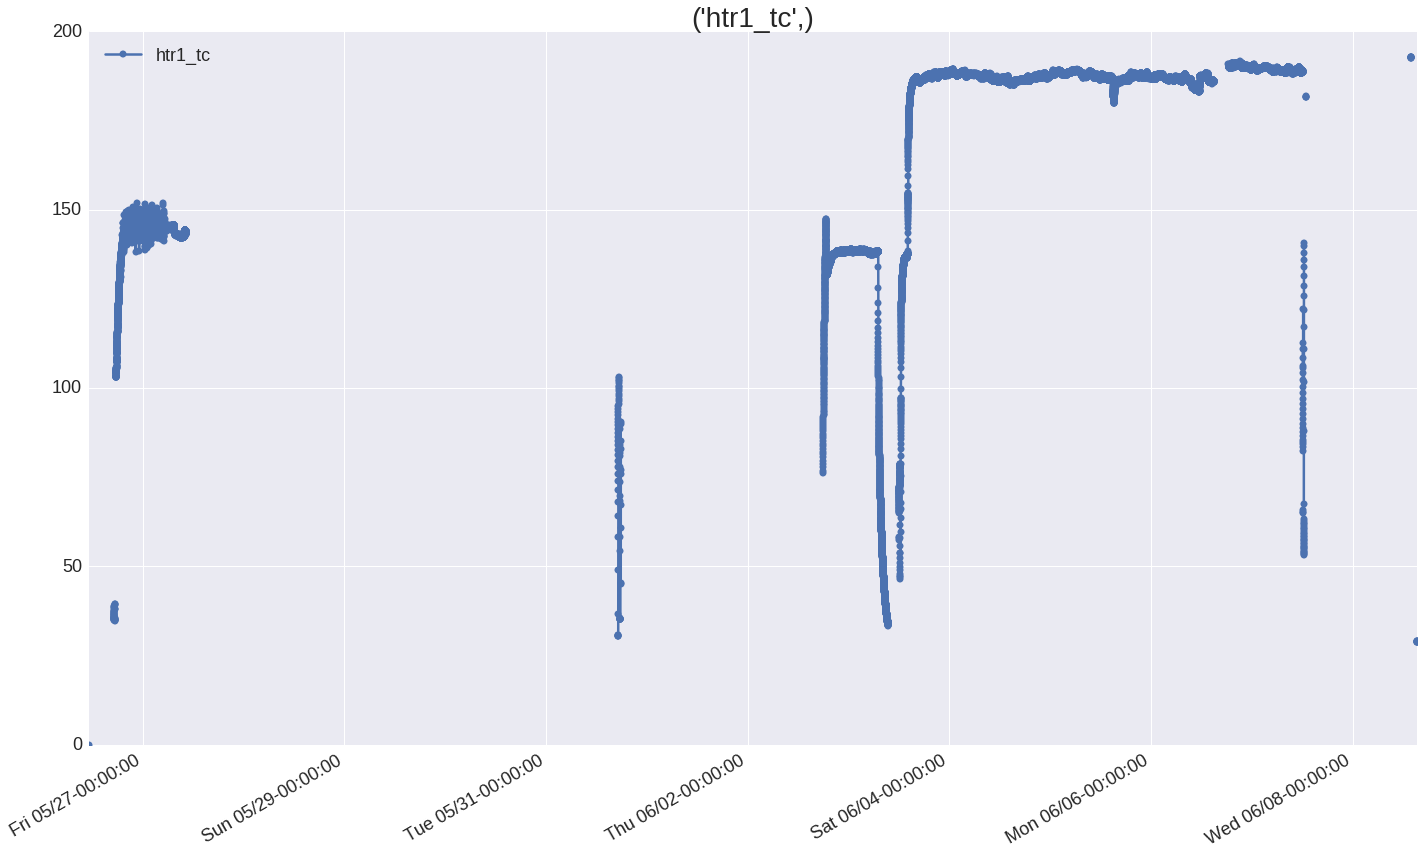

In [6]:
iSlidePlot(plc)

In [7]:
plc.head()

,date,foreline_valve_closed,foreline_valve_open,hivac_valve_closed,hivac_valve_open,rough_valve_closed,rough_valve_open,sys_rct_valve_closed,sys_rct_valve_open,sys_rga_valve_closed,...,amb_rtd3,amb_rtd4,htr1_tc,htr2_tc,spare_tc1,spare_tc2,spare_tc3,spare_tc4,spare_tc5,spare_tc6
2016-05-25 17:36:42.384228,2016-05-25 17:36:42.384228,1,0,1,0,0,1,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-25 17:36:42.820773,2016-05-25 17:36:42.820773,1,0,1,0,0,1,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-25 17:36:43.279732,2016-05-25 17:36:43.279732,1,0,1,0,0,1,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-25 17:36:43.712284,2016-05-25 17:36:43.712284,1,0,1,0,0,1,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-25 17:36:44.146016,2016-05-25 17:36:44.146016,1,0,1,0,0,1,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cursor = connectDbase('PVCAL')
lastTime(cursor, '1A_caldata')


'2016-05-18 21:11:08'

In [9]:
firstTime(cursor, '1A_caldata')


'2016-05-18 19:11:55'

In [ ]:
def readSome(cursor, tableName, start='2016-05-18 19:11:55', end='2016-05-18 19:12:00'):

    colName = getColName(cursor, tableName)

    cursor.execute('SELECT * FROM %s WHERE date BETWEEN \'%s\' and \'%s\''%(tableName,start,end))
    data = cursor.fetchall()
    df = initDataFrame(data, colName)
    return df

In [ ]:
df = readSome(cursor, '1A_caldata', '2016-05-18 21:00:00', '2016-05-18 21:05:08')

In [ ]:
df.resample('us').max()